In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
import math
import re
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
raw = pd.read_csv("drive/My Drive/Beer Reviews.csv")

In [15]:
raw.head()

,Unnamed: 0,Beer_Name,Rating,Review
0,0,Kentucky Brunch Brand Stout,None,None
1,0,Kentucky Brunch Brand Stout,5,I didnt think i was going to give it a perfect...
2,0,Kentucky Brunch Brand Stout,3.79,So I just read a review that called the legend...
3,0,Kentucky Brunch Brand Stout,4.64,"2021 vintage, bottle #79\n\nHoly. Fucking. Shi..."
4,0,Kentucky Brunch Brand Stout,4.27,"Celebrating my buddy @Rug with his 1,000th bee..."


In [16]:
def punctuation_extermination(s):
    o = str.maketrans('', '', string.punctuation)
    return str(s).translate(o)

raw['Review'] = raw['Review'].apply(punctuation_extermination)

raw.head()

,Unnamed: 0,Beer_Name,Rating,Review
0,0,Kentucky Brunch Brand Stout,None,None
1,0,Kentucky Brunch Brand Stout,5,I didnt think i was going to give it a perfect...
2,0,Kentucky Brunch Brand Stout,3.79,So I just read a review that called the legend...
3,0,Kentucky Brunch Brand Stout,4.64,2021 vintage bottle 79\n\nHoly Fucking Shit KB...
4,0,Kentucky Brunch Brand Stout,4.27,Celebrating my buddy Rug with his 1000th beer ...


In [25]:
raw_corpus = ""
for l in raw['Review']:
    l = str(l).lower()
    raw_corpus += l

raw_corpus[:500]

'nonei didnt think i was going to give it a perfect score but its looks smells tastes a 5 however the mouth feel is not by any means equal to look smell and taste pardon me i have to sit down mouth feel is well 11 yeh like twice as good as anything ive ever had before it grabs you by the face with both hands and says what was that that just went down my throat it tasted familiar like real pure butter on real belgiumchocolate buttermilk pancakes with fresh highbush blueberries real vermont maple s'

In [26]:
raw_corpus = raw_corpus.split()
corpus_without_stop = [word for word in raw_corpus if word not in stopwords.words("english")]
corpus_without_stop[:500]

['nonei',
 'didnt',
 'think',
 'going',
 'give',
 'perfect',
 'score',
 'looks',
 'smells',
 'tastes',
 '5',
 'however',
 'mouth',
 'feel',
 'means',
 'equal',
 'look',
 'smell',
 'taste',
 'pardon',
 'sit',
 'mouth',
 'feel',
 'well',
 '11',
 'yeh',
 'like',
 'twice',
 'good',
 'anything',
 'ive',
 'ever',
 'grabs',
 'face',
 'hands',
 'says',
 'went',
 'throat',
 'tasted',
 'familiar',
 'like',
 'real',
 'pure',
 'butter',
 'real',
 'belgiumchocolate',
 'buttermilk',
 'pancakes',
 'fresh',
 'highbush',
 'blueberries',
 'real',
 'vermont',
 'maple',
 'syrup',
 'madagascar',
 'vanilla',
 'served',
 'seattle',
 'coffee',
 'shot',
 'pappyso',
 'read',
 'review',
 'called',
 'legendary',
 'kbbs',
 '“typical…white',
 'trash”',
 'kinda',
 'made',
 'nervous',
 'don’t',
 'dig',
 'whitepale',
 'stouts',
 'thought',
 '“how',
 'could',
 'miss',
 'white',
 'stout”',
 'well',
 'happily',
 'guy',
 'drinking',
 'something',
 'else',
 'maybe',
 'meant',
 'kbbs',
 'like',
 'mountain',
 'dew',
 'enjoye

In [27]:
freq = FreqDist(corpus_without_stop)
last_rank = 50

words = [element[0] for element in freq.most_common(last_rank)] # words (x axis)
counts = [element[1] for element in freq.most_common(last_rank)] # freqs (y axis)

In [28]:
def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.ylabel("Count")
    plt.xlabel("Word")
    plt.xticks(rotation=69)
    plot = sns.barplot(labels,counts)
    return plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


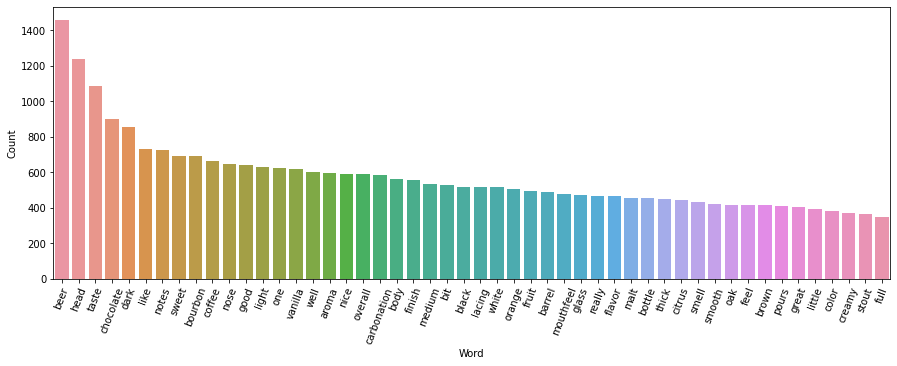

In [29]:
plot_word_frequency(corpus_without_stop, 50)

<h3>Attributes selected: Chocolate, Dark, Sweet, Bourbon, Coffee</h3>

In [30]:
WORD = re.compile(r"\w+")

def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [31]:
attr = 'chocolate dark sweet bourbon coffee'
attr_vector = text_to_vector(attr)

df_similarity = pd.DataFrame(data=[raw['Beer_Name'], raw['Review']]).T
df_similarity.columns = ['product_name', 'product_review']
df_similarity = df_similarity.drop(0)
df_similarity['similarity_score'] = df_similarity['product_review']
df_similarity['similarity_score'] = df_similarity['similarity_score'].apply(lambda r: get_cosine(attr_vector, text_to_vector(r)))

In [32]:
df_similarity.head()

,product_name,product_review,similarity_score
1,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.035921
2,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.019702
3,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.110674
4,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.071157
5,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.063246


In [33]:
df_brandwise = df_similarity[df_similarity['similarity_score'] != 0].groupby(by='product_name').mean()
df_brandwise.head()

,similarity_score
product_name,
A Deal With The Devil - Double Oak-Aged,0.095450
A Deal With The Devil - Triple Oak-Aged,0.138721
Abner,0.023313
Abrasive Ale,0.015972
Abraxas,0.095875


In [37]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 14.9 MB/s 


In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords

In [39]:
df_scores = pd.read_csv("similarity_scores.csv")
df_scores.head()

,Unnamed: 0,product_name,product_review,similarity_score
0,1,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.035921
1,2,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.019702
2,3,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.110674
3,4,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.071157
4,5,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.063246


In [40]:
def windowmaker(attr, sent):
    if attr not in sent:
        return None
    attr_idx = sent.index(attr)
    i, j = attr_idx - 2, attr_idx + 2
    if i < 0:
        i = 0
    if j > len(sent):
        j = len(sent)
    return sent[i:j]

In [41]:
stop = stopwords.words('english')

def remove_stopwords(sent):
    new = []
    for w in sent:
        if w not in stop:
            new.append(w)
    return new

In [42]:
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_score(sentence):
    if not sentence:
        return None
    sentence = ' '.join(sentence)
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [43]:
attrs = ['chocolate', 'dark', 'sweet', 'bourbon', 'coffee']

df_scores_filt = df_scores[df_scores['similarity_score'] != 0].copy()

for attr in attrs:
    col_name = f'{attr}_score'
    df_scores_filt[col_name] = df_scores_filt['product_review'].apply(str.lower)
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(lambda r: re.sub(r'[^A-Za-z0-9 ]+', '', r))
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(str.split)
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(remove_stopwords)
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(lambda r: windowmaker(attr, r))
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(lambda r: sentiment_analyzer_score(r))

In [44]:
df_scores_filt.head()

,Unnamed: 0,product_name,product_review,similarity_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
0,1,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.035921,NaN,NaN,NaN,NaN,0.0000
1,2,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.019702,NaN,0.6222,NaN,NaN,0.1779
2,3,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.110674,0.0,NaN,NaN,0.0,0.0000
3,4,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.071157,0.0,NaN,NaN,NaN,NaN
4,5,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.063246,NaN,NaN,NaN,NaN,NaN


In [45]:
df_scores_filt.describe()

,Unnamed: 0,similarity_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
count,989.000000,989.000000,496.000000,471.000000,468.000000,368.000000,347.000000
mean,1294.995956,0.114104,0.094939,0.077446,0.473938,0.112040,0.080115
std,762.544032,0.079937,0.215531,0.195770,0.210252,0.221719,0.209191
min,1.000000,0.007223,-0.557400,-0.493900,-0.471700,-0.476700,-0.526700
25%,592.000000,0.052154,0.000000,0.000000,0.458800,0.000000,0.000000
50%,1359.000000,0.093026,0.000000,0.000000,0.458800,0.000000,0.000000
75%,1982.000000,0.156293,0.000000,0.000000,0.509500,0.177900,0.000000
max,2504.000000,0.454077,0.807400,0.807400,0.859100,0.875000,0.784500


In [46]:
df_brandwise = df_scores_filt[df_scores_filt['similarity_score'] != 0].groupby(by='product_name').mean()

In [47]:
def avg(row):
    scores = [row['chocolate_score'], row['dark_score'], row['sweet_score'], row['bourbon_score'], row['coffee_score']]
    n = 0 # war crime
    avg = 0
    for s in scores:
        if np.isnan(s) or s==0:
            continue
        n += 1
        avg += s
    if n == 0:
        n += 1
    return avg / n

df_brandwise['avg_score'] = df_brandwise.apply(lambda b: avg(b), axis=1)

In [48]:
df_brandwise.head()

,Unnamed: 0,similarity_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score,avg_score
product_name,,,,,,,,
A Deal With The Devil - Double Oak-Aged,197.75,0.095450,NaN,0.000000,0.48415,0.075433,0.0000,0.279792
A Deal With The Devil - Triple Oak-Aged,177.50,0.138721,NaN,0.000000,0.45880,0.000000,NaN,0.458800
Abner,392.00,0.023313,NaN,NaN,0.45880,NaN,NaN,0.458800
Abrasive Ale,1741.00,0.015972,NaN,NaN,0.45880,NaN,NaN,0.458800
Abraxas,2393.70,0.095875,0.079629,0.069675,0.53690,0.273200,0.0602,0.203921



### TASK F - SpacY Scores


In [49]:
%%capture
!pip install spacy
!python -m spacy download en_core_web_lg


In [50]:
import spacy
import en_core_web_lg
nlp = en_core_web_lg.load()


/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


In [51]:
df_scores = pd.read_csv("similarity_scores.csv")


In [53]:
nlp = en_core_web_lg.load()
scores = df_scores.copy()
scores.drop('similarity_score', axis=1, inplace=True)
doc1 = nlp(attr)
scores['spacy_score'] = scores['product_review'].apply(lambda doc2: doc1.similarity(nlp(doc2)))


/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  """


In [54]:
spacygroups = scores[scores['spacy_score'] != 0].groupby(by='product_name').mean()


In [55]:
def no_attrs(s):
    attrs = ['chocolate', "dark" , "sweet" , "bourbon" ,"coffee"]
    s = s.lower()
    s = re.sub(r'[^A-Za-z0-9 ]+', '', s)
    s = s.split()
    for attr in attrs:
        if attr in s:
            return True
    return False
  
def remove_stop(sent):
    new = []
    for w in sent:
        if w not in stop:
            new.append(w)
    return new

In [67]:
attrs = ['chocolate', "dark" , "sweet" , "bourbon" ,"coffee"]
spacy_filter = scores.copy()
mask = spacy_filter['product_review'].apply(no_attrs)
df_scores_spacy_filt = spacy_filter[mask]
for attr in attrs:
    col_name = f'{attr}_score'
    spacy_filter[col_name] = spacy_filter['product_review'].apply(str.lower)
    spacy_filter[col_name] = spacy_filter[col_name].apply(lambda r: re.sub(r'[^A-Za-z0-9 ]+', '', r))
    spacy_filter[col_name] = spacy_filter[col_name].apply(str.split)
    spacy_filter[col_name] = spacy_filter[col_name].apply(remove_stop)
    spacy_filter[col_name] = spacy_filter[col_name].apply(lambda r: windowmaker(attr, r))
    spacy_filter[col_name] = spacy_filter[col_name].apply(lambda r: sentiment_analyzer_score(r))

spacy_filter.describe()


,Unnamed: 0,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
count,2513.000000,2513.000000,504.000000,486.000000,491.000000,377.000000,351.000000
mean,1257.000000,0.301099,0.093330,0.078167,0.473247,0.113060,0.080702
std,725.584936,0.126966,0.214197,0.195100,0.206961,0.221079,0.209488
min,1.000000,-0.139216,-0.557400,-0.493900,-0.471700,-0.476700,-0.526700
25%,629.000000,0.279531,0.000000,0.000000,0.458800,0.000000,0.000000
50%,1257.000000,0.334659,0.000000,0.000000,0.458800,0.000000,0.000000
75%,1885.000000,0.375109,0.000000,0.000000,0.458800,0.177900,0.000000
max,2513.000000,0.642339,0.807400,0.807400,0.875000,0.875000,0.784500


In [68]:
spacy_filter.head()

,Unnamed: 0,product_name,product_review,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
0,1,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.366655,NaN,NaN,NaN,NaN,0.0000
1,2,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.336536,NaN,0.6222,NaN,NaN,0.1779
2,3,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.422252,0.0,NaN,NaN,0.0,0.0000
3,4,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.386349,0.0,NaN,NaN,NaN,NaN
4,5,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.412261,NaN,NaN,NaN,NaN,NaN


In [69]:
spacy_average = spacy_filter[spacy_filter['spacy_score'] != 0].groupby(by='product_name').mean()
spacy_average.head()


,Unnamed: 0,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
product_name,,,,,,,
4th Anniversary,975.0,0.202632,NaN,NaN,NaN,NaN,NaN
A Deal With The Devil - Double Oak-Aged,197.5,0.313260,NaN,0.0,0.48415,0.075433,0.0
A Deal With The Devil - Triple Oak-Aged,175.5,0.243270,NaN,0.0,0.45880,0.000000,NaN
Abner,395.0,0.293890,NaN,NaN,0.45880,NaN,NaN
Abrasive Ale,1745.5,0.308300,NaN,NaN,0.45880,NaN,NaN


In [70]:
spacy_average.fillna(0)


,Unnamed: 0,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
product_name,,,,,,,
4th Anniversary,975.0,0.202632,0.00000,0.00000,0.00000,0.000000,0.00000
A Deal With The Devil - Double Oak-Aged,197.5,0.313260,0.00000,0.00000,0.48415,0.075433,0.00000
A Deal With The Devil - Triple Oak-Aged,175.5,0.243270,0.00000,0.00000,0.45880,0.000000,0.00000
Abner,395.0,0.293890,0.00000,0.00000,0.45880,0.000000,0.00000
Abrasive Ale,1745.5,0.308300,0.00000,0.00000,0.45880,0.000000,0.00000
...,...,...,...,...,...,...,...
XTRA DUBL Benthic,1792.5,0.292601,0.13935,0.27360,0.54185,0.059300,0.05744
Yellow Bus,2086.5,0.305748,0.00000,0.00000,0.00000,0.000000,0.00000
Zenne Y Frontera,120.0,0.296439,0.00000,0.19090,0.45880,0.000000,0.00000


In [71]:
spacy_average['avg_sent'] = spacy_average.apply(lambda r: avg(r), axis=1)
spacy_average.head()


,Unnamed: 0,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score,avg_sent
product_name,,,,,,,,
4th Anniversary,975.0,0.202632,NaN,NaN,NaN,NaN,NaN,0.000000
A Deal With The Devil - Double Oak-Aged,197.5,0.313260,NaN,0.0,0.48415,0.075433,0.0,0.279792
A Deal With The Devil - Triple Oak-Aged,175.5,0.243270,NaN,0.0,0.45880,0.000000,NaN,0.458800
Abner,395.0,0.293890,NaN,NaN,0.45880,NaN,NaN,0.458800
Abrasive Ale,1745.5,0.308300,NaN,NaN,0.45880,NaN,NaN,0.458800
